# Cargando las librerias requeridas

In [46]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn import metrics as mt

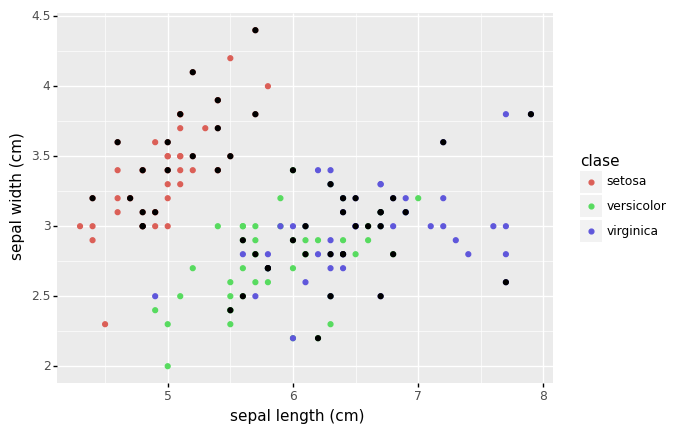

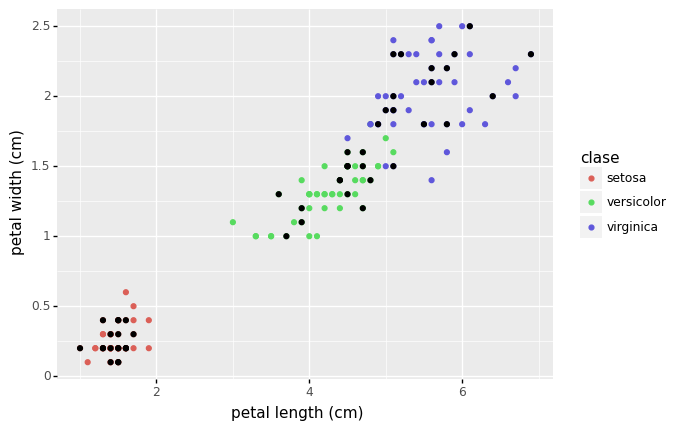

In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() #Cargando el dataset de la flor de iris
tempDF=pd.DataFrame(iris.data,columns=iris.feature_names)
tempDF['clase']=iris.target_names[iris.target]

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.33, random_state=42)

testData=pd.DataFrame(X_test,columns=iris.feature_names)
testData["Labels"]=y_test
print(ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="clase")+ geom_point()+geom_point(data=testData,color="black"))

print(ggplot(tempDF)+aes(x="petal length (cm)", y="petal width (cm)",color="clase")
 +geom_point()+geom_point(data=testData,color="black"))


# Módulo naive_bayes

El módulo sklearn.naive_bayes tiene distintas clases para poder entrenar y aplicar el modelo Naive Bayes. En este curso aprenderemos las clases GaussianNB y CategoricalNB<br>

GaussianNB aplica Naive Bayes sobre datos numéricos asumiendo distribuciones Gausseanas para cada clase.<br>
sklearn.naive_bayes.GaussianNB(*, var_smoothing=1e-09)
Parámetro
* var_smoothing: suavización para el cálculo de la varianza para estabilidad.<br>

<br>Atributos
* class_count_: número de datos de entrenamiento para cada clase.
* class_prior_: probabilidad de cada clase P(C).
* classes_n: número de clases conocidas por el clasificador.
* sigma_: Desviación estándar de cada distribución (será eliminado), posteriormente usar var_.
* theta_: media de cada distribución<br>

<br>métodos/funciones
* fit(X, y): "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* predict(X): predice las etiquetas para los puntos dados
* predict_proba(X): predice las probabilidades de las clases para los puntos dados
* predict_log_proba(X): predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [48]:
#Creando un objeto Naive Bayes con las condiciones iniciales
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB = NB.fit(X_train,y_train)


In [49]:
#Aplicando el modelo a otros datos
resultado=NB.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)


Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


In [50]:

#Aplicando el modelo a otros datos
resultado=NB.predict_proba(X_test)
print("Resultado de la predicción:\n")
resultado
np.around(resultado, 3)

Resultado de la predicción:



array([[0.   , 0.997, 0.003],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.978, 0.022],
       [0.   , 0.86 , 0.14 ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.994, 0.006],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.474, 0.526],
       [0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.999, 0.001],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.075, 0.925],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.001, 0.999],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.959, 0.041],
       [1.

In [64]:
from sklearn import metrics as mt

print(mt.classification_report(y_test,NB.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# Observando los parámetros aprendidos
Es posible obtener información de los parámetros aprendidos

In [29]:
print("Clases:\n",iris.target_names)
print("características:\n",iris.feature_names)
print("\nDistribución a prior (P(C)):\n",NB.class_prior_)
print("\nMedias:\n",NB.theta_)
print("\nDesviación estandar (sqrt de var):\n",np.sqrt(NB.var_))

Clases:
 ['setosa' 'versicolor' 'virginica']
características:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Distribución a prior (P(C)):
 [0.31 0.35 0.34]

Medias:
 [[4.96451613 3.37741935 1.46451613 0.2483871 ]
 [5.85142857 2.72571429 4.22       1.30857143]
 [6.55294118 2.97058824 5.54411765 2.01176471]]

Desviación estandar (sqrt de var):
 [[0.33461426 0.36957664 0.18236509 0.10737625]
 [0.52119173 0.29504756 0.49442608 0.20194969]
 [0.66696649 0.30344048 0.54675039 0.27840376]]


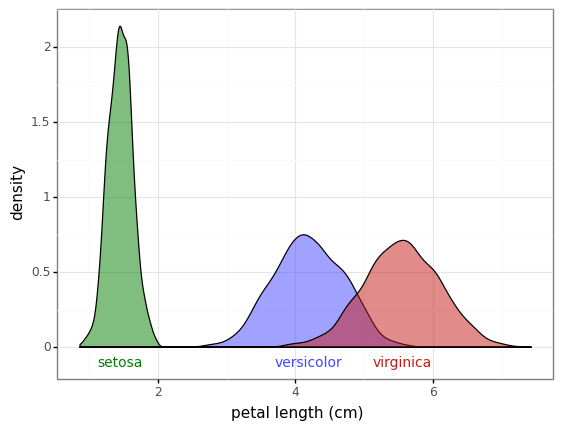

<ggplot: (327752427)>

In [30]:
#Visualización de las distribuciones
tempDF=pd.DataFrame(np.zeros((1000,3)),columns=['setosa','versicolor','virginica'])
varSeleccionada=2
for i in range(3):
    tempDF.iloc[:,i] = np.random.normal(NB.theta_[i][varSeleccionada], np.sqrt(NB.var_[i][varSeleccionada]), 1000)
(ggplot(tempDF)+theme_bw()+
 geom_density(aes(x='setosa'),fill="#007F00",alpha=0.5)+
 geom_density(aes(x='versicolor'),fill="#4446FF",alpha=0.5)+
 geom_density(aes(x='virginica'),fill="#C41A16",alpha=0.5)+
 annotate("text",x=tempDF.setosa.mean(),y=-0.1,label="setosa",color="#007F00",size=10)+
 annotate("text",x=tempDF.versicolor.mean(),y=-0.1,label="versicolor",color="#4446FF",size=10)+
 annotate("text",x=tempDF.virginica.mean(),y=-0.1,label="virginica",color="#C41A16",size=10)+ 
 labs(y="density",x=iris.feature_names[varSeleccionada])
)

# Visualización de datos luna

/usr/local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
<ipython-input-37-3436aed68323>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


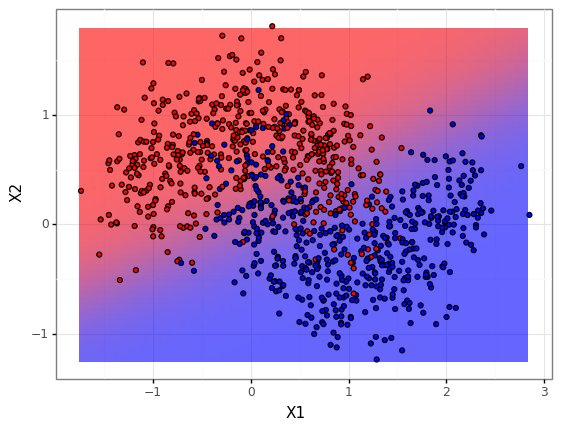

In [37]:
#Generando dos lunas separables entre si
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=10)

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB = NB.fit(tempData[0],tempData[1])

#Visualización de la frontera de decisión.
#Creando una grilla de evaluación
x = np.arange(tempData[0][:,0].min(),tempData[0][:,0].max(), 0.05)
y = np.arange(tempData[0][:,1].min(),tempData[0][:,1].max(),0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten(),columns=["X1"])
dataTest.insert(1,"X2",temp[1].flatten())

#Prediciendo y graficando el output
probEstimada=NB.predict_proba(dataTest.iloc[:,0:2])
output=(((1-probEstimada[:,1])*255).astype("int"))

dataTest.insert(2, "ClassOutput", "0")
for i in range(dataTest.shape[0]):
    dataTest.ClassOutput[i]='#%02x%02x%02x' % (output[i],0,255-output[i])

#Colores para los puntos originales
colorData=pd.DataFrame(list(map(str,tempData[1])),columns=["colorClass"])
colorData.colorClass[colorData.colorClass=="0"]="Red"
colorData.colorClass[colorData.colorClass=="1"]="Blue"
    
tempDF=pd.DataFrame(tempData[0],columns=["X1","X2"])
# Generating the plot with ggplot/plotnine
pp=(ggplot()+aes(x="X1",y="X2")+theme_bw()
  +geom_tile(data=dataTest,alpha=0.6,show_legend=False,fill=dataTest.ClassOutput)
  +geom_point(data=tempDF,show_legend=False,color="black",fill=colorData)
)
print(pp)



In [36]:
print("\nDistribución a prior (P(C)):\n",NB.class_prior_)
print("\nMedias:\n",NB.theta_)
print("\nDesviación estandar (sqrt de var):\n",np.sqrt(NB.var_))


Distribución a prior (P(C)):
 [0.5 0.5]

Medias:
 [[-0.01043211  0.64007046]
 [ 0.99256525 -0.11553308]]

Desviación estandar (sqrt de var):
 [[0.77178384 0.4277666 ]
 [0.76980054 0.44738888]]


# Datos categoricos
Lamentablemente sklearn no ha querido trabajar con texto, por lo cual, todos los datos hay que cambiarlos a números antes de aplicar el modelo. Esto ha llevado a una MUY MALA práctica (vista en varios "post" de machine learning), que es aplicar GaussianNB a los datos transformados, lo cual no tiene sentido.



In [311]:
from sklearn.model_selection import train_test_split
#Leyendo los datos de banco
df = pd.read_csv('./data/bank.csv',sep=';')
df = df.iloc[:,[1,2,3,4,6,7,8,16]]
df


,job,marital,education,default,housing,loan,contact,y
0,unemployed,married,primary,no,no,no,cellular,no
1,services,married,secondary,no,yes,yes,cellular,no
2,management,single,tertiary,no,yes,no,cellular,no
3,management,married,tertiary,no,yes,yes,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,no
...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,no
4518,technician,married,secondary,no,no,no,cellular,no
4519,blue-collar,married,secondary,no,no,no,cellular,no


In [333]:
from sklearn.preprocessing import LabelEncoder
dfEncoded = pd.DataFrame()
le = LabelEncoder()
#Creando mapa para entender el modelo y transformándolo a valores numéricos
mapa={}
for i in df.columns:
    dfEncoded[i] = le.fit_transform(df[i])
    mapa[i]=le.classes_
mapa

{'job': array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 'marital': array(['divorced', 'married', 'single'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'telephone', 'unknown'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [334]:
dfEncoded

,job,marital,education,default,housing,loan,contact,y
0,10,1,0,0,0,0,0,0
1,7,1,1,0,1,1,0,0
2,4,2,2,0,1,0,0,0
3,4,1,2,0,1,1,2,0
4,1,1,1,0,1,0,2,0
...,...,...,...,...,...,...,...,...
4516,7,1,1,0,1,0,0,0
4517,6,1,2,1,1,1,2,0
4518,9,1,1,0,0,0,0,0
4519,1,1,1,0,0,0,0,0


In [318]:
# from sklearn.utils.random import sample_without_replacement
# index = sample_without_replacement(np.sum(dfEncoded['y']==0), 500)
# df2 = pd.concat([dfEncoded[dfEncoded['y']==0].iloc[index], dfEncoded[dfEncoded['y']==1]])

In [335]:
X_train, X_test, y_train, y_test = train_test_split(dfEncoded.iloc[:,0:7],dfEncoded.iloc[:,7], test_size=0.33, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,0:7],df2.iloc[:,7], test_size=0.33, random_state=0)


# CategoricalNB
Para aplicar Naive Bayes sobre datos categóricos se utiliza la clase CategoricalNB.<br>
sklearn.naive_bayes.CategoricalNB(alpha=1.0)

Parámetro
* alpha: Laplace smoothing (0 para no tener smoothing). Sea $N$ el número de puntos de entrenamiento, $N_{x_i}$ el número de puntos correspondiente al valor i de la variable a estimar, y |C| el número de posibles valores de la variable, entonces $\hat{p}_i=\displaystyle\frac{N_{x_i}+\alpha}{N+|C|\alpha}$<br>

<br>Atributos
* class_count_: número de datos de entrenamiento para cada clase.
* classes_n: número de clases conocidas por el clasificador.
* category_count_: número de datos de entrenamiento para cada categoría.
* class_log_prior_: logaritmo de la probabilidad de cada clase P(C). 
* feature_log_prob_: logaritmo de la probabilidad para cada variable dada cada clase P(X|C).<br>

<br>métodos/funciones
* fit(X, y): "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* predict(X): predice las etiquetas para los puntos dados
* predict_proba(X): predice las probabilidades de las clases para los puntos dados
* predict_log_proba(X): predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [336]:
#Creando un objeto Naive Bayes con las condiciones iniciales
from sklearn.naive_bayes import CategoricalNB
NB = CategoricalNB()
NB = NB.fit(X_train,y_train)



              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1306
           1       0.14      0.01      0.01       186

    accuracy                           0.87      1492
   macro avg       0.51      0.50      0.47      1492
weighted avg       0.78      0.87      0.82      1492



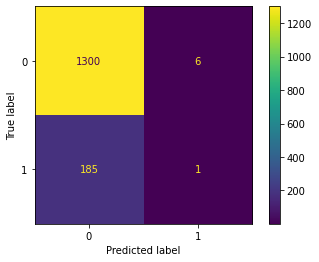

In [337]:
#Aplicando el modelo a los datos de test
resultado=NB.predict(X_test)
# test
disp = mt.ConfusionMatrixDisplay(mt.confusion_matrix(y_test, resultado))
disp.plot()
print(mt.classification_report(y_test,resultado))

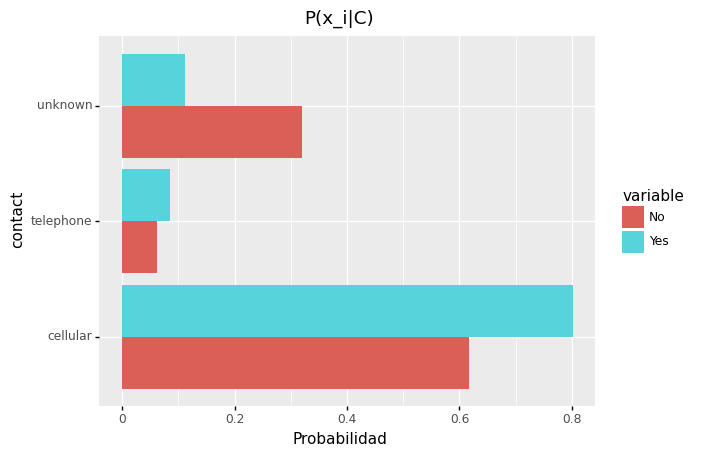

<ggplot: (328268282)>

In [340]:
variable_a_analizar = 6
probs = pd.DataFrame(np.exp(NB.feature_log_prob_[variable_a_analizar]).transpose(), columns=['No','Yes'], index=mapa[df.columns[variable_a_analizar]])
ggplot(probs.reset_index().melt(id_vars='index'),\
aes(x='index',y='value',fill='variable'))\
+ geom_col(position = 'dodge') + coord_flip()\
+ ylab('Probabilidad') + xlab(df.columns[variable_a_analizar])+ ggtitle('P(x_i|C)')